In [2]:
from netCDF4 import Dataset
import numpy as np
import xarray as xr
from scipy.interpolate import griddata
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# luka data manager

In [ ]:
netcdf_file = 'https://opendap1.nodc.no/opendap/physics/point/cruise/nansen_legacy-single_profile/NMDC_Nansen-Legacy_PR_CT_58US_2021708/CTD_station_P1_NLEG01-1_-_Nansen_Legacy_Cruise_-_2021_Joint_Cruise_2-1.nc'
xrds = xr.open_dataset(netcdf_file)
xrds

<xarray.Dataset> Size: 44kB
Dimensions:        (PRES: 320)
Coordinates:
  * PRES           (PRES) float32 1kB 1.0 2.0 3.0 4.0 ... 318.0 319.0 320.0
Data variables: (12/33)
    PRES_QC        (PRES) float32 1kB ...
    TEMP           (PRES) float32 1kB ...
    PSAL           (PRES) float32 1kB ...
    FLU2           (PRES) float32 1kB ...
    CNDC           (PRES) float32 1kB ...
    DENS           (PRES) float32 1kB ...
    ...             ...
    OXYOCPVL-1_QC  (PRES) float32 1kB ...
    SPAR_QC        (PRES) float32 1kB ...
    PAR_QC         (PRES) float32 1kB ...
    PSAL-2_QC      (PRES) float32 1kB ...
    TEMP-2_QC      (PRES) float32 1kB ...
    ATTNZS01_QC    (PRES) float32 1kB ...
Attributes: (12/73)
    qc_manual:                       Recommendations for in-situ data Near Re...
    contact:                         datahjelp@hi.no
    distribution_statement:          These data are public and free of charge...
    naming_authority:                no.unis
    license:                         https://creativecommons.org/licenses/by/...
    data_assembly_center:            IMR
    ...                              ...
    station_name:                    P1 (NLEG01)
    _NCProperties:                   version=2,netcdf=4.6.3,hdf5=1.10.5
    date_created:                    2022-08-08T12:44:34Z
    doi:                             10.21335/NMDC-2085836005-P1_NLEG01-1
    title:                           CTD_station_P1_NLEG01-1_-_Nansen_Legacy_...
    metadata_link:                   https://doi.org/10.21335/NMDC-2085836005...

In [ ]:
print(xrds.attrs['Conventions'])

coords = xrds.coords
print(coords)

In [ ]:
print(xrds.data_vars['TEMP'].values)

[3.735 3.738 3.739 3.741 3.736 3.737 3.736 3.742 3.736 3.738 3.783 3.833
 3.838 3.837 3.83  3.806 3.792 3.79  3.814 3.846 3.858 3.833 3.815 3.817
 3.814 3.812 3.792 3.709 3.704 3.642 3.582 3.546 3.512 3.484 3.368 3.297
 3.165 3.106 3.094 3.094 3.102 3.079 3.094 3.076 3.035 3.009 2.992 2.981
 2.954 2.933 2.903 2.874 2.85  2.824 2.801 2.787 2.764 2.713 2.711 2.705
 2.701 2.696 2.682 2.665 2.651 2.647 2.642 2.635 2.624 2.588 2.604 2.608
 2.593 2.507 2.472 2.468 2.46  2.453 2.441 2.43  2.431 2.43  2.431 2.433
 2.43  2.417 2.394 2.382 2.361 2.335 2.32  2.303 2.275 2.267 2.263 2.277
 2.27  2.265 2.262 2.256 2.241 2.216 2.201 2.191 2.176 2.135 2.11  2.091
 2.071 2.064 2.103 2.106 2.099 2.095 2.092 2.088 2.082 2.085 2.093 2.09
 2.089 2.085 2.054 2.022 2.019 2.021 2.026 2.027 2.036 2.041 2.06  2.082
 2.084 2.087 2.093 2.097 2.099 2.098 2.1   2.101 2.099 2.095 2.094 2.094
 2.102 2.101 2.095 2.082 2.078 2.076 2.076 2.072 2.066 2.064 2.063 2.065
 2.065 2.063 2.058 2.041 2.032 2.028 2.027 2.026 2.0

## graphing

In [ ]:
netcdf_file = 'https://opendap1.nodc.no/opendap/chemistry/point/cruise/nansen_legacy/2021708/Chlorophyll_A_and_phaeopigments_Nansen_Legacy_cruise_2021708_station_P4_NLEG11_20210718T085042.nc'
xrds = xr.open_dataset(netcdf_file)
xrds

<xarray.DataArray 'CHLOROPHYLL_A_TOTAL' (DEPTH: 11)> Size: 88B
[11 values with dtype=float64]
Coordinates:
  * DEPTH    (DEPTH) float32 44B 323.0 200.3 120.1 90.24 ... 20.12 10.09 5.163
Attributes:
    standard_name:          mass_concentration_of_chlorophyll_a_in_sea_water
    long_name:              Mass concentration of Chlorophyll A in sea water,...
    units:                  μg L-1
    ancillary_variables:    FILTERED_VOL_TOTAL, EVENTID_TOTAL
    coverage_content_type:  physicalMeasurement


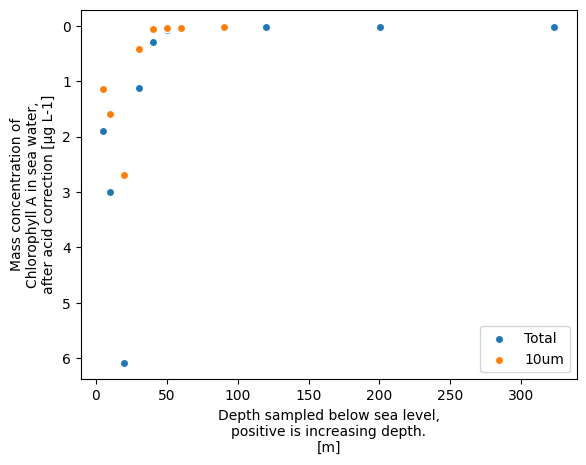

In [ ]:
#xr.plot.line(xrds['CHLOROPHYLL_A_TOTAL'].dropna('DEPTH'), y = 'DEPTH', yincrease = False)

xrds['CHLOROPHYLL_A_TOTAL'].plot.scatter(y = 'DEPTH', yincrease = False, label = 'Total')
xrds['CHLOROPHYLL_A_10um'].plot.scatter(y = 'DEPTH', yincrease = False, label = '10um')
plt.legend()
plt.show()


# xrds['CHLOROPHYLL_A_TOTAL'].plot()
#plt.show()

In [ ]:
url = 'https://www.ncei.noaa.gov/thredds/dodsC/noaa-global-temp-v5/NOAAGlobalTemp_v5.0.0_gridded_s188001_e202212_c20230108T133308.nc'
xrds = xr.open_dataset(url)
xrds

<xarray.Dataset> Size: 18MB
Dimensions:  (time: 1716, lat: 36, lon: 72, z: 1)
Coordinates:
  * time     (time) datetime64[ns] 14kB 1880-01-01 1880-02-01 ... 2022-12-01
  * lat      (lat) float32 144B -87.5 -82.5 -77.5 -72.5 ... 72.5 77.5 82.5 87.5
  * lon      (lon) float32 288B 2.5 7.5 12.5 17.5 ... 342.5 347.5 352.5 357.5
  * z        (z) float32 4B 0.0
Data variables:
    anom     (time, z, lat, lon) float32 18MB ...
Attributes: (12/66)
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           NOAA Merged Land Ocean Global Surface Te...
    summary:                         NOAAGlobalTemp is a merged land-ocean su...
    institution:                     DOC/NOAA/NESDIS/National Centers for Env...
    id:                               gov.noaa.ncdc:C00934 
    naming_authority:                 gov.noaa.ncei 
    ...                              ...
    time_coverage_duration:          P143Y0M
    references:                      Vose, R. S., et al., 2012: NOAAs merged ...
    climatology:                     Climatology is based on 1971-2000 monthl...
    acknowledgment:                  The NOAA Global Surface Temperature Data...
    date_modified:                   2023-01-08T18:33:09Z
    date_issued:                     2023-01-08T18:33:09Z

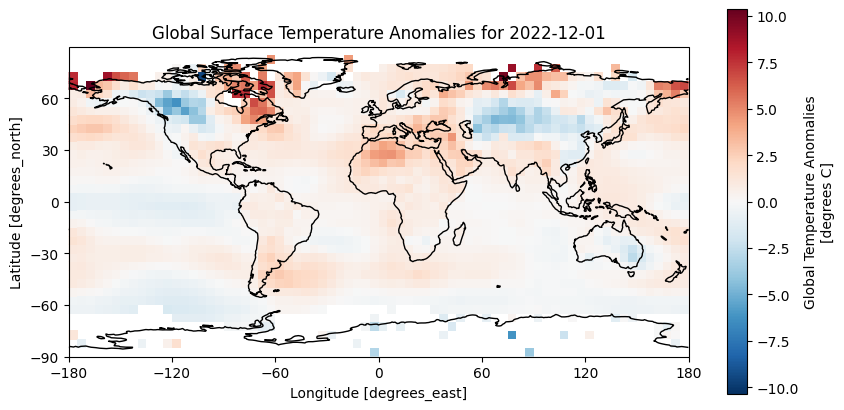

In [ ]:
#print(xrds['anom'])

desired_date = '2022-12-01'
data_for_desired_date = xrds.sel(time = desired_date)

#print(data_for_desired_date)

plt.figure(figsize = (10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

ax.set_xticks(range(-180, 181, 60), crs = ccrs.PlateCarree())
ax.set_yticks(range(-90,90,30), crs = ccrs.PlateCarree())
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')


data_for_desired_date['anom'].plot()

plt.title(f"Global Surface Temperature Anomalies for {desired_date}")

plt.show()


# Python Methods for Oceanography

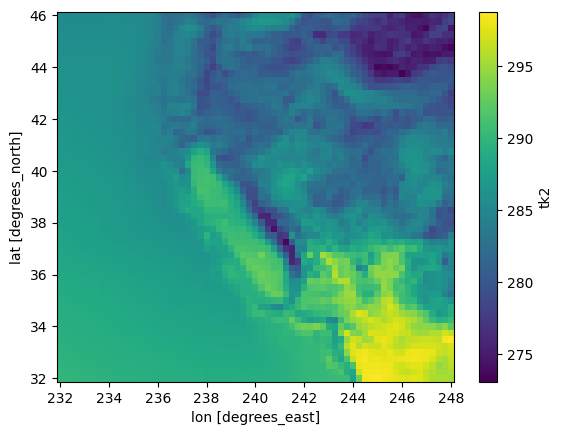

In [3]:
data = xr.open_dataset("CA_GFS_0p25_f000_2017-2023.nc")
mean_temp = data['tk2'].mean(dim = 'time')
mean_temp.plot()